# MPlots - Eamonn
> Following Eammon exsamples of Motif discovery
> Section VI.C - Figure 11: Insect pest feeding on a plant

## Insects

### Download  & convert dataset

In [1]:
from dvats.load import download_file_from_google_drive, unzip_mat, mat2csv, zip_contents
import os

In [2]:
file_id = '1qq1z2mVRd7PzDqX0TDAwY7BcWVjnXUfQ'
data_path = os.path.expanduser('~/data')
destination = os.path.join(data_path, 'InsectData-fig11.zip')

In [3]:
download_file_from_google_drive(file_id, destination)
mat_files = zip_contents(destination)
print(unzip_mat('all', destination, data_path))

/home/macu/data/InsectData-fig11.zip
File downloaded as: /home/macu/data/InsectData-fig11.zip
--> Unzip_mat all /home/macu/data/InsectData-fig11.zip /home/macu/data  True
['Insect_one_million.mat']
['Insect_one_million.mat'] extracted to /home/macu/data


In [4]:
mat_name = mat_files[0]

In [5]:
mat2csv(data_path+"/"+mat_name, print_flag = True)

(1000000, 1)


Insect_one_million
0            0.236820
1            0.236820
2            0.238040
3            0.206300
4            0.026855

Matlab matrix 'Insect_one_million' converted to CSV in: ~/data/Insect_one_million.csv


In [6]:
import pandas as pd

In [7]:
mat_name = mat_name.split('.')[0]
mat_name

'Insect_one_million'

In [8]:
df = pd.read_csv(data_path+'/'+mat_name+'.csv')

In [9]:
print(df.shape)
display(df.head(5))

(1000000, 1)


Insect_one_million
0            0.236820
1            0.236820
2            0.238040
3            0.206300
4            0.026855

In [10]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.gridspec import GridSpec

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [11]:
def plot_dataFrame(title, df):
    num_vars = len(df.columns)
    fig = plt.figure(figsize=(10, num_vars * 3))  # Ajusta el tamaño del plot según el número de variables
    gs = GridSpec(num_vars, 1)

    for i, var in enumerate(df.columns):
        ax = fig.add_subplot(gs[i])
        ax.plot(df.index, df[var], label=var)  # Asumiendo que df.index contiene los valores temporales
        ax.set_title(f"{var}")
        ax.set_xlabel("Time")
        ax.set_ylabel(var)
        ax.legend()

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()
        
    

In [12]:
df.shape

(1000000, 1)

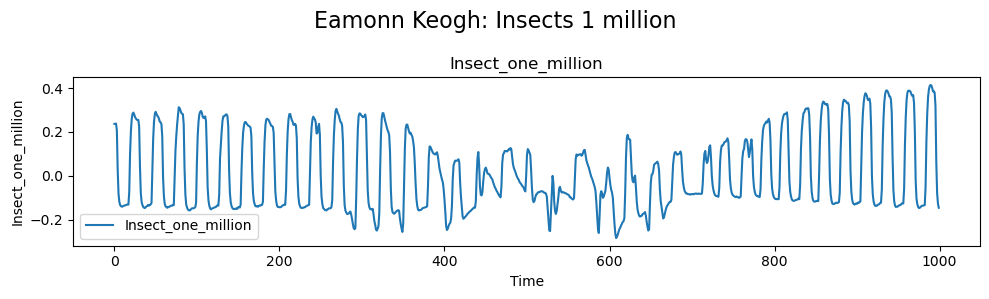

In [13]:
plot_dataFrame("Eamonn Keogh: Insects 1 million", df[:1000])

In [14]:
def plot_dataFrame_variable_with_intervals(title, df, var_num, interval=10000):
    if var_num >= len(df.columns):
        raise ValueError("var_num is out of the range of DataFrame columns")
    
    var = df.columns[var_num]
    data = df[var]
    num_intervals = len(data) // interval + 1  # Calcula el número necesario de intervalos/subplots

    fig = plt.figure(figsize=(10, num_intervals * 3))  # Ajusta el tamaño del plot según el número de intervalos
    gs = GridSpec(num_intervals, 1)

    for i in range(num_intervals):
        ax = fig.add_subplot(gs[i])
        start_idx = i * interval
        end_idx = start_idx + interval

        # Si es el último intervalo, ajusta end_idx para incluir el resto de los datos
        if i == num_intervals - 1:
            end_idx = len(data)

        ax.plot(np.arange(start_idx, end_idx), data[start_idx:end_idx], label=f"{var} [{start_idx}, {end_idx}]")
        ax.set_title(f"{var} [{start_idx}, {end_idx}]")
        ax.set_xlabel("Index")
        ax.set_ylabel(var)
        ax.legend()

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

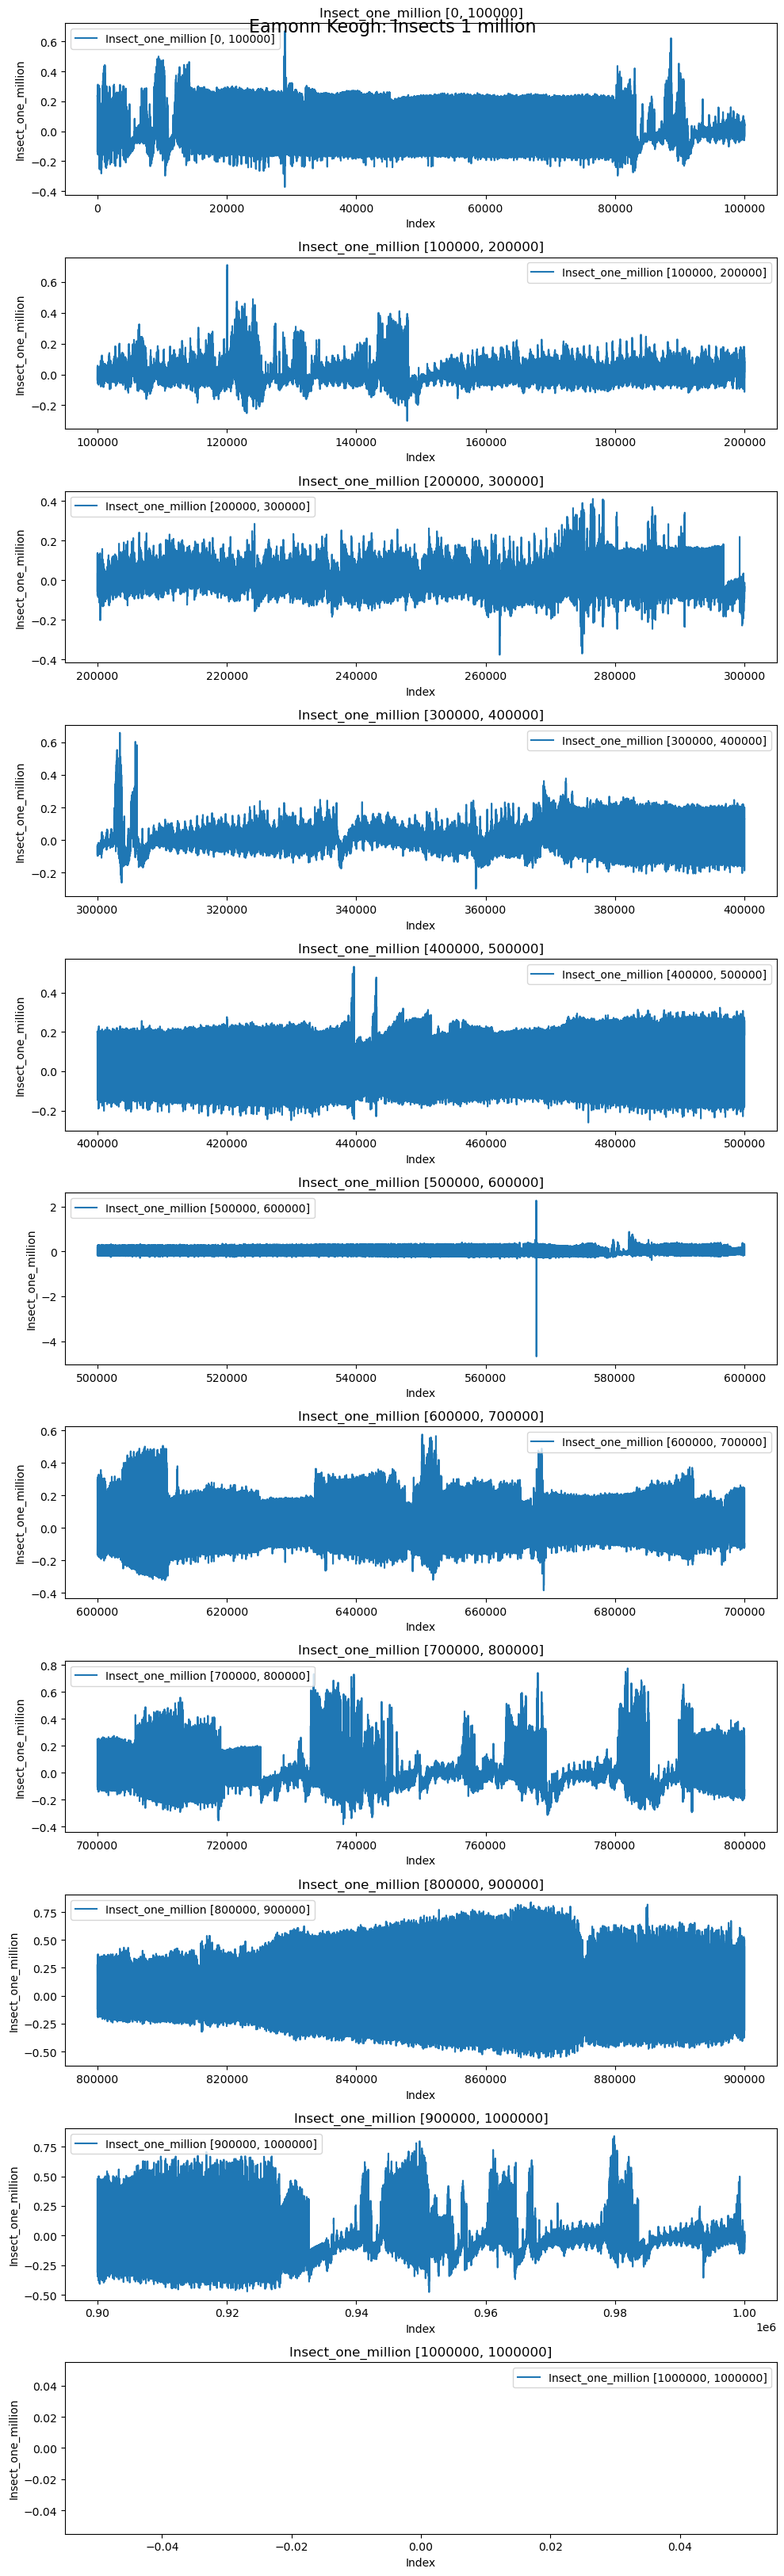

In [15]:
plot_dataFrame_variable_with_intervals("Eamonn Keogh: Insects 1 million", df, 0, 100000)

In [35]:
import matplotlib

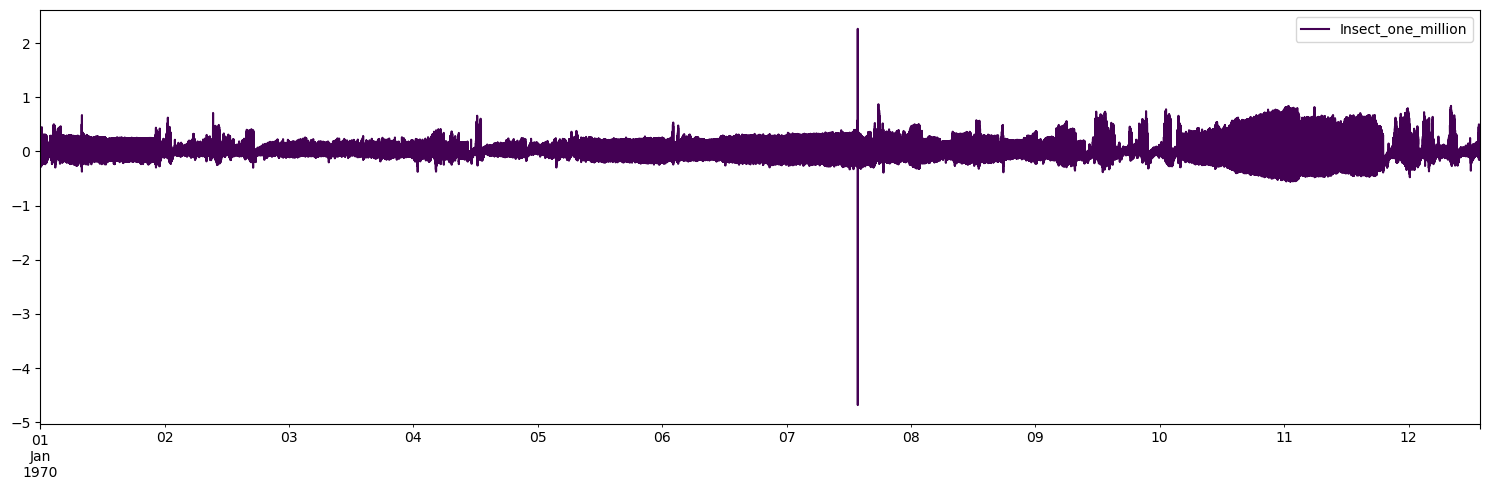

None

In [36]:
def df_plot_colored_variables(df):
    # Show time series plot
    fig, ax = plt.subplots(1, figsize=(15,5), )
    cmap = matplotlib.colormaps.get_cmap('viridis')
    #df.plot(color=cmap(0.05), ax=ax) # or use colormap=cmap
    df.plot(colormap=cmap, ax=ax) # or use colormap=cmap
    # rect = Rectangle((5000, -4.2), 3000, 8.4, facecolor='lightgrey', alpha=0.5)
    # ax.add_patch(rect)
    plt.tight_layout()
    plt.legend()
    display(plt.show())
df_plot_colored_variables(df)

In [37]:
def plot_df_with_intervals_and_colors(title, df, interval=10000):
    num_variables = len(df.columns)
    num_intervals = len(df) // interval + 1  # Calcula el número necesario de intervalos/subplots

    fig = plt.figure(figsize=(10, num_intervals * 3 * num_variables))  # Ajusta el tamaño del plot
    gs = GridSpec(num_intervals * num_variables, 1)
    
    cmap = matplotlib.colormaps.get_cmap('viridis')

    for var_num, var in enumerate(df.columns):
        data = df[var]
        for i in range(num_intervals):
            ax = fig.add_subplot(gs[var_num * num_intervals + i])
            start_idx = i * interval
            end_idx = start_idx + interval

            if i == num_intervals - 1:  # Ajusta el último intervalo para incluir todos los datos restantes
                end_idx = len(data)

            color = cmap(var_num / num_variables)  # Asigna un color basado en la variable
            ax.plot(np.arange(start_idx, end_idx), data[start_idx:end_idx], label=f"{var} [{start_idx}, {end_idx}]", color=color)
            ax.set_title(f"{var} [{start_idx}, {end_idx}]")
            ax.set_xlabel("Index")
            ax.set_ylabel(var)
            ax.legend()

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

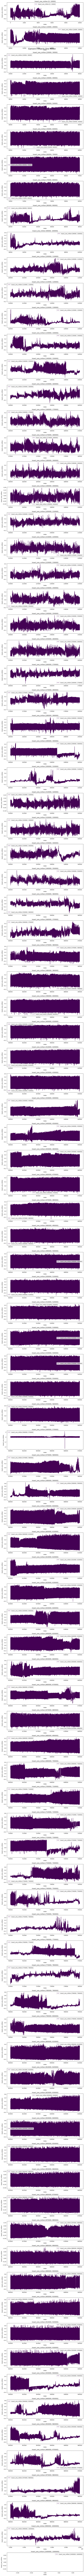

In [38]:
plot_df_with_intervals_and_colors("Eamonn | Insects One Million", df)

### Setup frequency as in 01

In [28]:
from dvats.load import *

In [31]:
df = infer_or_inject_freq(
    df, 
    injected_freq = '1s', 
    start_date = None, 
    format='%Y-%m-%d %H:%M:%S'
)
print(df.index.freq)

<Second>


In [33]:
df

Insect_one_million
1970-01-01 00:00:00            0.236820
1970-01-01 00:00:01            0.236820
1970-01-01 00:00:02            0.238040
1970-01-01 00:00:03            0.206300
1970-01-01 00:00:04            0.026855
...                                 ...
1970-01-12 13:46:35            0.014648
1970-01-12 13:46:36            0.030518
1970-01-12 13:46:37            0.034180
1970-01-12 13:46:38            0.013428
1970-01-12 13:46:39           -0.053711

[1000000 rows x 1 columns]

## Find a motif using SCAMP

In [16]:
import pyscamp as scamp

In [17]:
import dvats.memory as mem
mem.gpu_memory_status

<function dvats.memory.gpu_memory_status(device=0)>

In [18]:
# Allows checking if pyscamp was built with CUDA and has GPU support.
has_gpu_support = scamp.gpu_supported()
has_gpu_support

True

In [44]:
import time

class Time:
    def __init__(self):
        self.time_start = None
        self.time_end = None
        self.time_total = 0

    def start(self): 
        self.time_start = time.time()
        return self.time_start

    def end(self):
        self.time_end = time.time()
        return self.time_end
        
    def duration(self):
        self.time_total=self.time_end - self.time_start
        return self.duration

    def __str__(self):
        """
        Representación en cadena de la clase Time.

        :return: Cadena que representa la instancia de Time.
        """
        if (self.time_total == 0): self.duration();
        return f"Time Start: {self.time_start}, Time End: {self.time_end}, Duration: {self.time_total}"


In [46]:
m = 187
log_time = Time()
log_time.start()
mp, index = scamp.selfjoin(df['Insect_one_million'], m)
log_time.end()
print(log_time)

Time Start: 1709657453.6056156, Time End: 1709657476.4441948, Duration: 22.838579177856445


In [50]:
mp_sorted = np.argsort(mp)
motif_idx = mp_sorted[0]
print(f"The motif is alocated at index {motif_idx}")

The motif is alocated at index 538137


In [51]:
nearest_neighbor_idx = index[motif_idx]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 524794


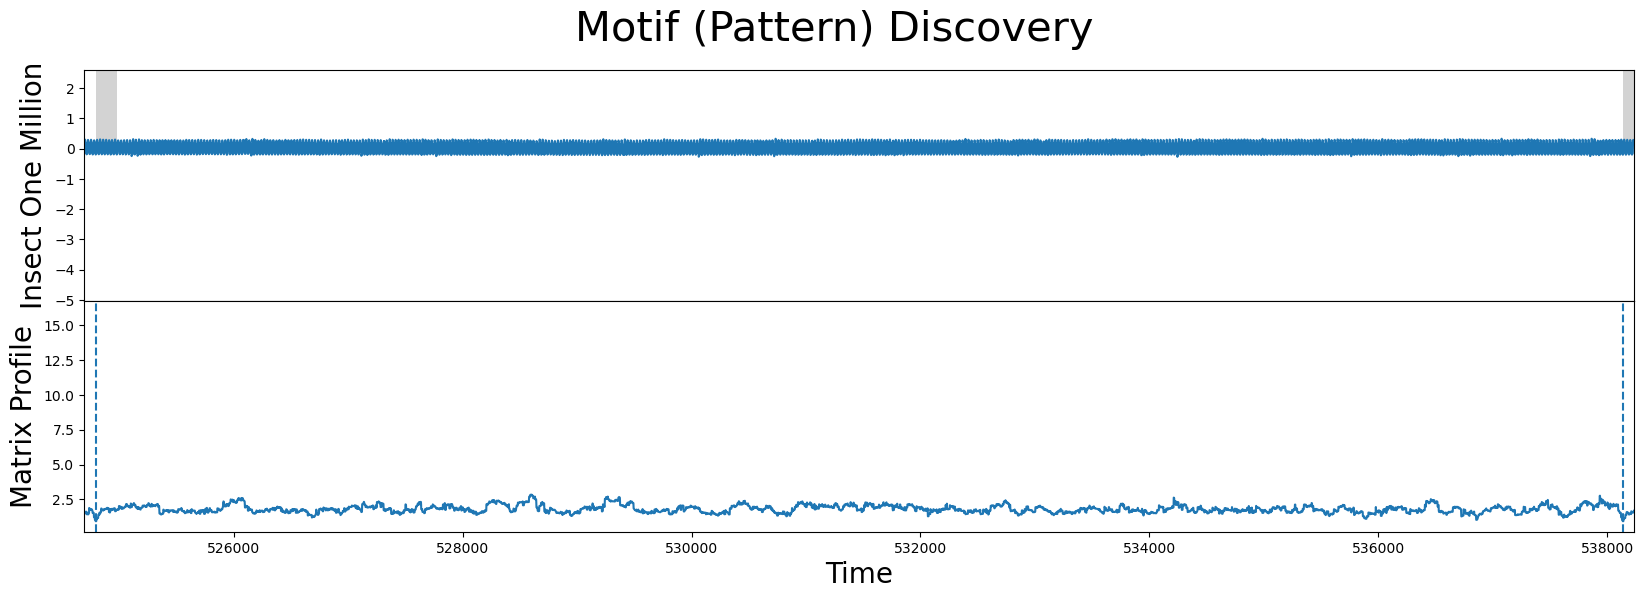

In [60]:
def plot_motif(df, motif_idx, nearest_neighbor_idx, variable_name, title, padding = 1000):
    fig, axs = plt.subplots(2, sharex = True, gridspec_kw={'hspace': 0})
    plt.suptitle('Motif (Pattern) Discovery', fontsize='30')
    padding = min(padding, len(df[variable_name].values) // 2)

    # Calcula los límites para hacer zoom
    x_min = max(min(motif_idx, nearest_neighbor_idx) - padding, 0)
    x_max = min(max(motif_idx, nearest_neighbor_idx) + padding, len(df[variable_name].values))

    axs[0].plot(df[variable_name].values)
    axs[0].set_xlim([x_min, x_max])  # Aplica el zoom aquí
    axs[0].set_ylabel(title, fontsize='20')
        
    axs[0].set_ylabel(title, fontsize='20')
    rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
    axs[0].add_patch(rect)
    rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
    axs[0].add_patch(rect)
    axs[1].set_xlabel('Time', fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=motif_idx, linestyle="dashed")
    axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
    axs[1].plot(mp)
    plt.show()

plot_motif(df, motif_idx, nearest_neighbor_idx, "Insect_one_million", "Insect One Million", 100)

In [94]:
def plot_motif_separated(df, motif_idx=0, nearest_neighbor_idx=0, variable_name="", title="", padding=1000, m=1):
    fig, axs = plt.subplots(4, sharex=False, figsize=( 12, 5), gridspec_kw={'hspace': 0.5})
    plt.suptitle('Motif (Pattern) Discovery', fontsize='20')
    
    padding = max(m, min(padding, len(df[variable_name].values) // 2))

    x_min_motif = max(motif_idx - padding, 0)
    x_max_motif = min(motif_idx + padding, len(df[variable_name].values))

    axs[0].plot(df[variable_name].values)
    axs[0].set_xlim([x_min_motif, x_max_motif])
    axs[0].set_ylabel(title, fontsize='10')
    rect_motif = Rectangle((motif_idx, df[variable_name].min()), m, df[variable_name].max() - df[variable_name].min(), facecolor='lightgrey')
    axs[0].add_patch(rect_motif)

    axs[1].plot(mp)
    axs[1].set_xlim([x_min_motif, x_max_motif])
    axs[1].set_xlabel('Time', fontsize='10')
    axs[1].set_ylabel('MP - Min', fontsize='10')
    axs[1].axvline(x=motif_idx, linestyle="dashed")

    x_min_neighbor = max(nearest_neighbor_idx - padding, 0)
    x_max_neighbor = min(nearest_neighbor_idx + padding, len(df[variable_name].values))

    axs[2].plot(df[variable_name].values)
    axs[2].set_xlim([x_min_neighbor, x_max_neighbor])
    axs[2].set_ylabel(title, fontsize='10')
    rect_neighbor = Rectangle((nearest_neighbor_idx, df[variable_name].min()), m, df[variable_name].max() - df[variable_name].min(), facecolor='lightgrey')
    axs[2].add_patch(rect_neighbor)

    axs[3].plot(mp)
    axs[3].set_xlim([x_min_neighbor, x_max_neighbor])
    axs[3].set_xlabel('Time', fontsize='10')
    axs[3].set_ylabel('MP-max', fontsize='10')
    axs[3].axvline(x=nearest_neighbor_idx, linestyle="dashed")

    plt.show()



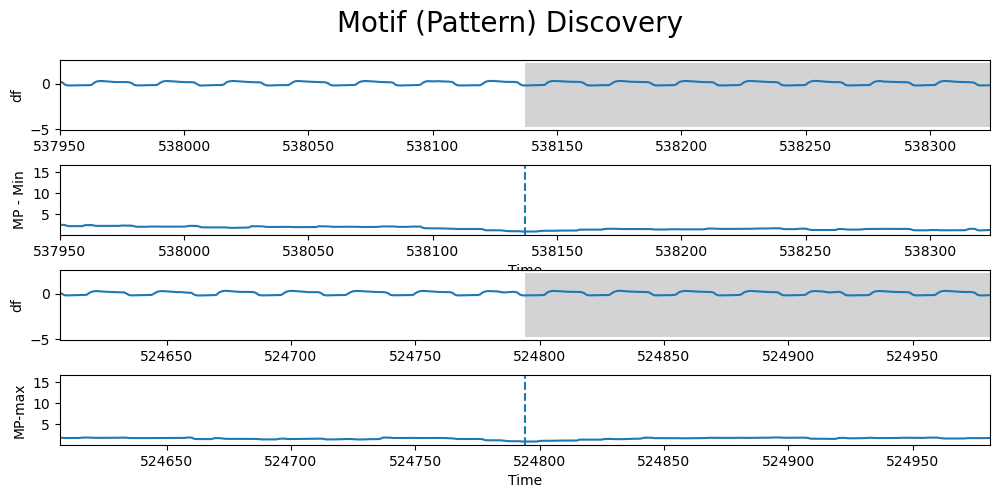

In [95]:
plot_motif_separated(df, motif_idx, nearest_neighbor_idx, "Insect_one_million", "df", 10, m)


No me ha salido lo esperado. Intentemos sacar el mismo motif que en el ejemplo

In [104]:
min = 34.5
seconds = int (min * 60)

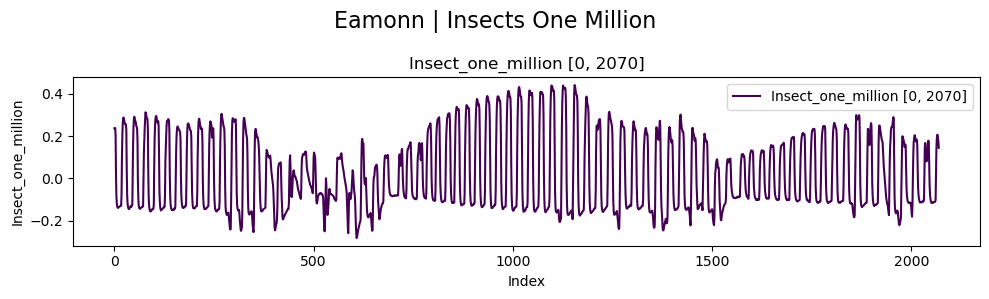

In [105]:
plot_df_with_intervals_and_colors("Eamonn | Insects One Million", df[:seconds])

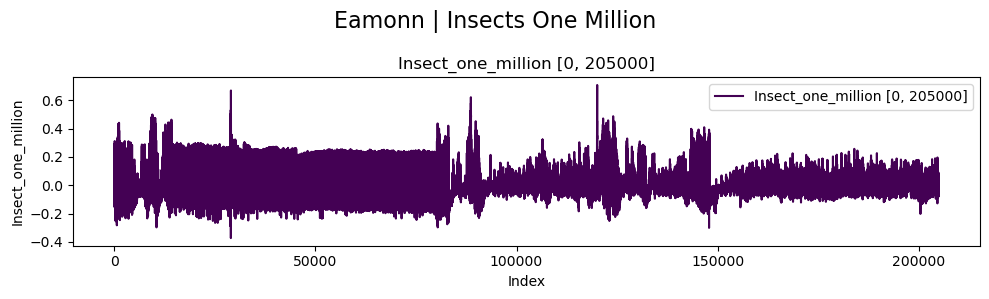

In [115]:
plot_df_with_intervals_and_colors("Eamonn | Insects One Million", df[:205000], 300000)

In [109]:
205000/60

3416.6666666666665

In [110]:
#plot_df_with_intervals_and_colors("Eamonn | Insects One Million", df[:205000])

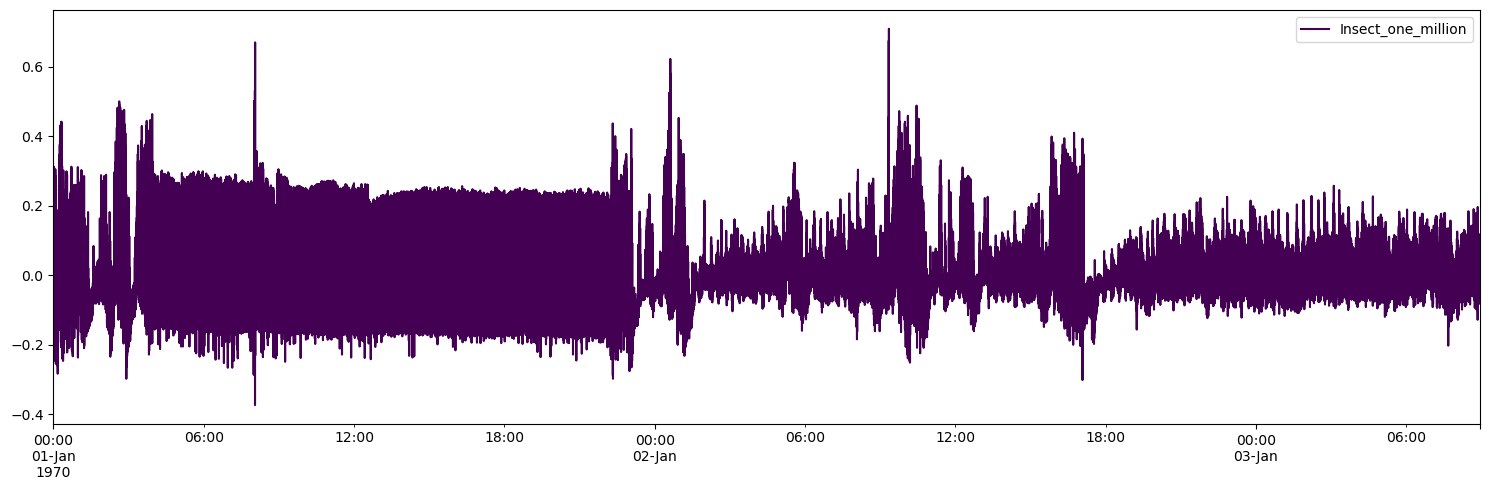

None

In [111]:
df_plot_colored_variables(df[:205000])

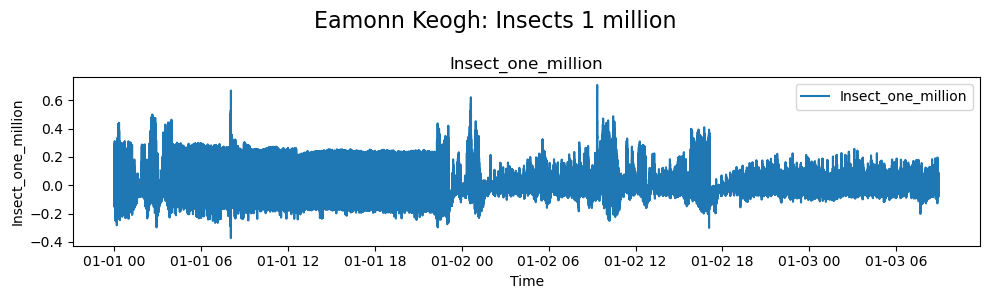

In [112]:
plot_dataFrame("Eamonn Keogh: Insects 1 million", df[:205000])

Tratando de descargar de nuevo el dataset... Pero ahora me pide solicitar acceso. ¿Me habré equivocado de dataset?